In [33]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-customers/BankChurners.csv


In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [35]:
data=pd.read_csv('../input/credit-card-customers/BankChurners.csv')

In [36]:
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


# Getting Categories of data infeatures

In [37]:
data['Education_Level'].unique()

array(['High School', 'Graduate', 'Uneducated', 'Unknown', 'College',
       'Post-Graduate', 'Doctorate'], dtype=object)

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

# Converting financial data to categirical

In [39]:
data['Income_Category'].replace({'Unknown' : -1, 'Less than $40K' : 1, '$40K - $60K' : 2, '$60K - $80K' : 3, '$80K - $120K' : 4, '$120K +' : 5}, inplace = True)

# Getting dummies variables

In [40]:
Att_flg=pd.get_dummies(data['Attrition_Flag'],drop_first=True)
Gen=pd.get_dummies(data['Gender'],drop_first=True)
Ed=pd.get_dummies(data['Education_Level'],drop_first=True)
Mar=pd.get_dummies(data['Marital_Status'],drop_first=True)
Crd=pd.get_dummies(data['Card_Category'],drop_first=True)

# Concatinating datasets

In [41]:
data=pd.concat([data,Att_flg,Gen,Ed,Mar,Crd],axis=1)

# Dropping extra columns

In [42]:
data.drop(['Attrition_Flag','Card_Category','Gender','Education_Level','CLIENTNUM','Marital_Status','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],axis=1,inplace=True)

In [43]:
data.columns

Index(['Customer_Age', 'Dependent_count', 'Income_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Existing Customer', 'M', 'Doctorate', 'Graduate', 'High School',
       'Post-Graduate', 'Uneducated', 'Unknown', 'Married', 'Single',
       'Unknown', 'Gold', 'Platinum', 'Silver'],
      dtype='object')

# Visualizing info about customers

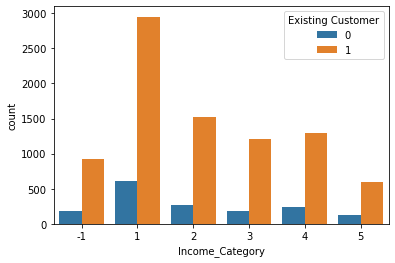

In [44]:
sns.countplot(x='Income_Category',hue='Existing Customer',data=data)

[]

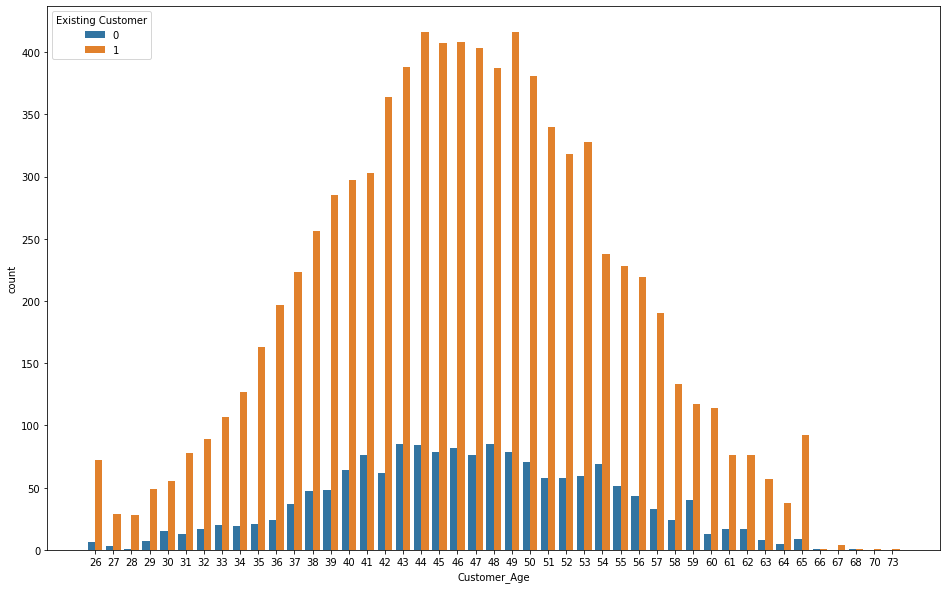

In [45]:
plt.figure(figsize=(16,10))
sns.countplot(data=data,x='Customer_Age',hue='Existing Customer')
plt.plot()

# Seprating data to Features and Targets

In [46]:
x=data.drop('Existing Customer',axis=1)
y=data['Existing Customer']

# Scaling the features

In [47]:
from sklearn.preprocessing import RobustScaler

In [48]:
scaler= RobustScaler()
xsc=scaler.fit_transform(x)

# *Splitting datasets*

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
x_tr,x_te,y_tr,y_te=train_test_split(xsc,y,test_size=0.3,random_state=42)

# Importing classification model

In [51]:
from sklearn.ensemble import RandomForestClassifier

In [52]:
classifier=RandomForestClassifier(n_estimators=100)
classifier.fit(x_tr,y_tr)

RandomForestClassifier()

# *Predicting test results*

In [53]:
y_pr=classifier.predict(x_te)

In [54]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [55]:
confusion_matrix(y_te,y_pr)

array([[ 405,   91],
       [  34, 2509]])

In [56]:
result=classification_report(y_te,y_pr)
print(result)

              precision    recall  f1-score   support

           0       0.92      0.82      0.87       496
           1       0.96      0.99      0.98      2543

    accuracy                           0.96      3039
   macro avg       0.94      0.90      0.92      3039
weighted avg       0.96      0.96      0.96      3039



In [57]:
accuracy_score(y_te,y_pr)

0.9588680487002303

# **96% Accuracy**
**Tuning the Parameters**

In [ ]:
from sklearn.model_selection import GridSearchCV
gsc=GridSearchCV(estimator=RandomForestClassifier(),
                param_grid={'n_estimators':[10,50,100,125,150],
                           'criterion':['gini', 'entropy'],
                           'max_depth':[0,3,6,9],
                           'min_samples_split':[0,2,4,6,8,10],
                           'max_features':['auto', 'sqrt', 'log2'],
                            'bootstrap':[True,False]
                           },
                  cv=5, scoring='neg_mean_squared_error', verbose=0, n_jobs=-1)

In [70]:
from sklearn.model_selection import GridSearchCV
gsc=GridSearchCV(estimator=RandomForestClassifier(),
                param_grid={'criterion':['gini', 'entropy'],
                           'max_depth':[0,3,6,9],
                           'min_samples_split':[0,2,4],
                           'max_features':['auto', 'sqrt', 'log2'],
                            'bootstrap':[True,False]
                           },
                  cv=5, scoring='neg_mean_squared_error', verbose=0, n_jobs=-1)

In [71]:
gsc.fit(x_tr,y_tr)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [0, 3, 6, 9],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [0, 2, 4]},
             scoring='neg_mean_squared_error')

In [72]:
gsc.best_params_

{'bootstrap': False,
 'criterion': 'entropy',
 'max_depth': 9,
 'max_features': 'auto',
 'min_samples_split': 4}

# Using best parameters to predict the data

In [74]:
rfc2=RandomForestClassifier(bootstrap= False,
 criterion= 'entropy',
 max_depth=9,
 max_features= 'auto',
 min_samples_split= 4)

In [76]:
rfc2.fit(x_tr,y_tr)

RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=9,
                       min_samples_split=4)

In [78]:
pre2=rfc2.predict(x_te)

In [80]:
result=classification_report(y_te,pre2)
print(result)

              precision    recall  f1-score   support

           0       0.93      0.72      0.81       496
           1       0.95      0.99      0.97      2543

    accuracy                           0.95      3039
   macro avg       0.94      0.85      0.89      3039
weighted avg       0.94      0.95      0.94      3039



In [82]:
accuracy_score(y_te,pre2)

0.9453767686739059

# **Although we now know what happens when GridSearchCV can't find you the best Parameters!**